In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv('data/bank-additional-full-preprocessed.csv')

data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [61]:
import torch
import torch.nn as nn
import torch.nn.functional as F



# Create a model class that inherits nn module
class Model(nn.Module):
    def __init__(self,in_features=19,h1=25,h2=26,out_features=2):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x





In [62]:
# pick a manual seed for randomization
torch.manual_seed(41)

# create instance of model
model = Model()

In [63]:
from sklearn.preprocessing import LabelEncoder

# Transforming categorical columns to numerical
cols = data.select_dtypes("object").columns
le = LabelEncoder()
data[cols] = data[cols].apply(le.fit_transform)

In [64]:
import numpy as np

# Train test Split

y = data['y']
X = data.drop(columns=['y'])

# Convert to numpy arrays
X = X.values
y = y.values

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [66]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert y features to float tensors
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [67]:
# Set the criterion to measure the error
criterion = nn.CrossEntropyLoss()

# Choose Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [70]:
# Train model

# Determining Epochs
epochs = 100
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)

    # Ensure y_train is the correct type for classification
    y_train = y_train.long()  # Only needed for classification problems

    # measure the loss
    loss = criterion(y_pred, y_train)

    # track loss
    losses.append(loss.detach().numpy())

    # print every 10 epochs
    if i % 10 ==0:
        print(f'Epoch {i} Loss: {loss}')

    # back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 Loss: 0.3330076336860657
Epoch 10 Loss: 0.3159702718257904
Epoch 20 Loss: 0.3153427839279175
Epoch 30 Loss: 0.3141644597053528
Epoch 40 Loss: 0.3131076991558075
Epoch 50 Loss: 0.3123365044593811
Epoch 60 Loss: 0.3116730749607086
Epoch 70 Loss: 0.3110640048980713
Epoch 80 Loss: 0.3104799687862396
Epoch 90 Loss: 0.3099014461040497


Text(0.5, 0, 'epoch')

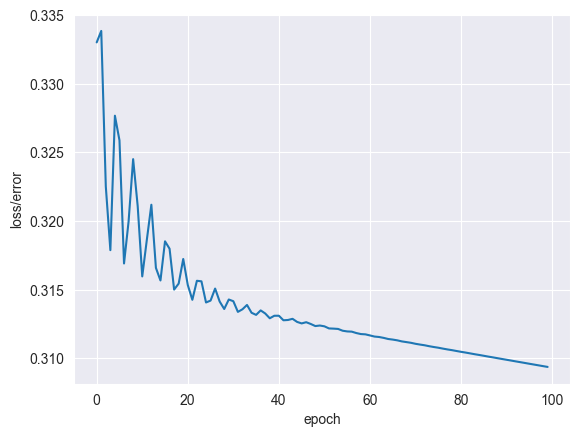

In [71]:
# Visualizing error
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")